Задание 1
#

Импортируем библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Загрузим файл.

In [2]:
df=pd.read_excel("hw_lesson03_dau.xlsx")

Установим столбец date в индекс таблицы с помощью команды .set_index('date').

In [3]:
df=df.set_index("date")


Построим линейный график DAU.\
Используем ; в конце последней строки, чтобы не получать на выводе ненужную информацию.

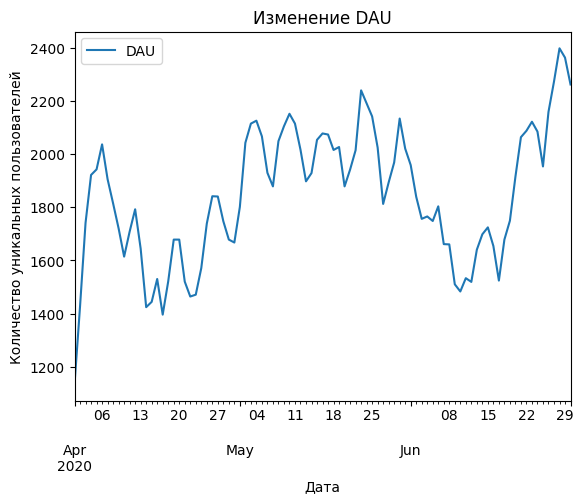

In [4]:
df.plot()
plt.title('Изменение DAU')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей');

Повторим те же самые действия с файлами hw_lesson03_dau_device.xlsx, hw_lesson03_dau_channel.xlsx, hw_lesson03_dau_region.xlsx , в которых находятся данные о DAU с разбивкой по устройствам, рекламным каналам и регионам.

In [5]:
df1=pd.read_excel("hw_lesson03_dau_device.xlsx")

In [6]:
df1=df1.set_index("date")
df1

,Andoroid,iPhone
date,,
2020-04-01,786,348
2020-04-02,996,431
2020-04-03,1193,548
2020-04-04,1307,614
2020-04-05,1297,645
...,...,...
2020-06-26,1462,696
2020-06-27,1553,719
2020-06-28,1672,725


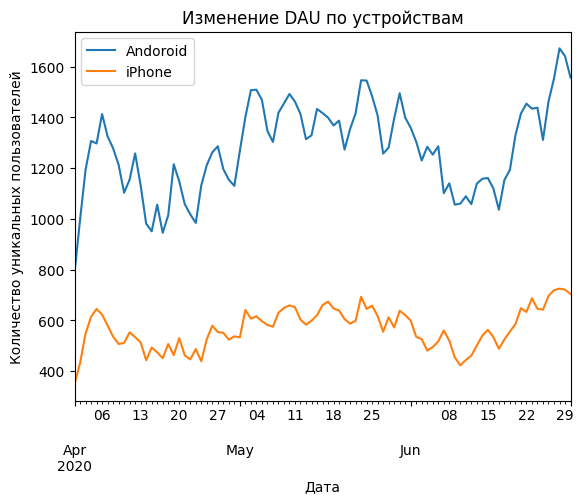

In [7]:
df1.plot()
plt.title('Изменение DAU по устройствам')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей');

In [8]:
df2=pd.read_excel("hw_lesson03_dau_channel.xlsx")

In [9]:
df2=df2.set_index("date")
df2

,BrainPlus,GameAds,JetAds,SenseAds
date,,,,
2020-04-01,627,292,159,56
2020-04-02,761,322,235,109
2020-04-03,887,427,306,121
2020-04-04,966,466,341,148
2020-04-05,951,479,346,166
...,...,...,...,...
2020-06-26,943,485,519,211
2020-06-27,1065,496,488,223
2020-06-28,1130,498,542,227


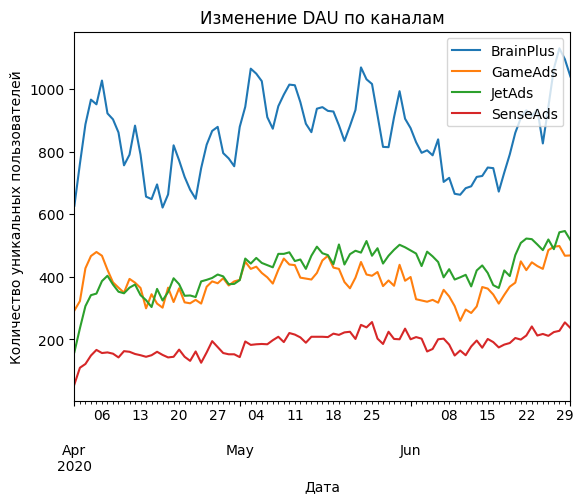

In [10]:
df2.plot()
plt.title('Изменение DAU по каналам')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей');

In [11]:
df3=pd.read_excel("hw_lesson03_dau_region.xlsx")

In [12]:
df3=df3.set_index("date")

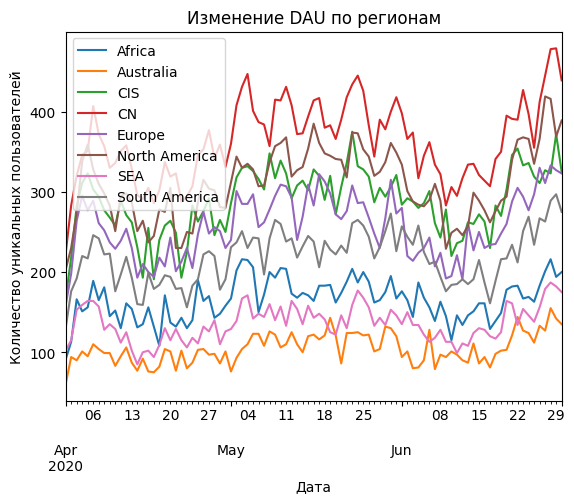

In [13]:
df3.plot()
plt.title('Изменение DAU по регионам')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей');

Выводы и наблбюдения:
1) Пик общего показателя DAU приходится на лето, возможно анализируемый сайт связан с продажей плавательных принадлежностей или с чем-то ещё, относящемуся к летнему сезону.
2) Основное количество активных пользователей используют android, a не iphone, возможно сайт лучше оптимизирован для android устройств.
3) Большая часть пользователей попадает на сайт с канала BrainPLUS.
4) Больше всего активных пользователей из Китая, наверное это просто связанно с огромной численностью населения этой страны.


Задание 2
#

Рассчитаем медианный DAU для каждого канала\
1.BrainPlus\
2.GameAds\
3.JetAds\
4.SenseAds

In [14]:
print(df2["BrainPlus"].median())
print(df2["GameAds"].median())
print(df2["JetAds"].median())
print(df2["SenseAds"].median())

866.0
385.0
434.0
188.0


Добавим в фрейм столбец Total, в котором посчитаем сумму DAU по всем рекламным каналам.

In [15]:
df2["Total"]=df2.sum(axis=1)


Создадим новый фрейм, в котором вместо абсолютных значений DAU хранятся данные о процента DAU от Total.

In [16]:
df4 = pd.DataFrame(columns=["BrainPLus","GameAds","JetAds","SenseAds"])
df4["BrainPLus"]=df2["BrainPlus"]/df2["Total"]*100
df4["GameAds"]=df2["GameAds"]/df2["Total"]*100
df4["JetAds"]=df2["JetAds"]/df2["Total"]*100
df4["SenseAds"]=df2["SenseAds"]/df2["Total"]*100


Построим график истории изменения процента DAU. По оси x графика должны быть отложены даты, а по оси y - процент от общего DAU для каждого рекламного канала. График имеет тип "области с накоплением".

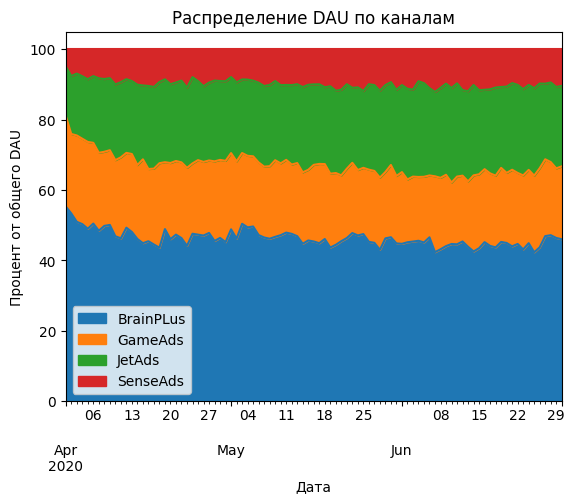

In [17]:
df4.plot.area()
plt.title('Распределение DAU по каналам')
plt.xlabel('Дата')
plt.ylabel('Процент от общего DAU');

Выводы и наблюдения:
1) Большая часть пользователей попадает на сайт через канал "BrainPlus".
2) Части пользователей, пришедшие с каналов "GameAds" и "JetAds" примерно равны.
3) Меньшая часть пользователей попадает на сайт через канал "SenseAds"

Задание 3
#

Загрузим файл.

In [18]:
df5=pd.read_excel("hw_lesson03_mau_region.xlsx")

С помощью команды .set_index('month') установим столбец month в индекс датафрейма.

In [19]:
df5=df5.set_index("month")

C помощью .loc поменяем значение для столбца Africa в мае на 5000.\
Май это 5 месяц.

In [20]:
df5.loc[[5],["Africa"]]=5000
df5

,Africa,Australia,CIS,CN,Europe,North America,SEA,South America
month,,,,,,,,
4,2490,1534,4229,5392,3845,4639,2058,3241
5,5000,1937,5432,6884,4872,5930,2587,4119
6,2805,1846,4941,6225,4387,5383,2361,3805


Напишим функцию, которая вычисляет сумму MAU в столбцах Australia и Africa и проверяет, превышает ли эта сумма значение в столбце CIS.\
У меня не получилось решить через apply, можешь пожалуйста скинуть как это должно выглядеть, мне выдаёт ошибку.

In [21]:
def get_sum(n):
    sm=n.sum(axis=0)
    if sm["Africa"]+sm["Australia"]>sm["CIS"]:
        return sm["Africa"]+sm["Australia"]
    else: 
        return 0
get_sum(df5)

np.int64(15612)

Создадим новый столбец 'EU превышает порог'. Он должен принимать значение True, в ситуациях, когда EU >= 4000 и False в противном случае.

In [22]:
df5["EU превышает порог"]=df5["Europe"]>=4000
df5

,Africa,Australia,CIS,CN,Europe,North America,SEA,South America,EU превышает порог
month,,,,,,,,,
4,2490,1534,4229,5392,3845,4639,2058,3241,False
5,5000,1937,5432,6884,4872,5930,2587,4119,True
6,2805,1846,4941,6225,4387,5383,2361,3805,True


Задание 4
#

Напишем обобщенную функцию исследования DAU. Функция должна принимать на вход имя файла с данными DAU. И выводить на экран:

​Таблицу DAU;

Линейный график DAU;

График долей пользователей (область с накоплением).

         date  BrainPlus  GameAds  JetAds  SenseAds
0  2020-04-01        627      292     159        56
1  2020-04-02        761      322     235       109
2  2020-04-03        887      427     306       121
3  2020-04-04        966      466     341       148
4  2020-04-05        951      479     346       166
..        ...        ...      ...     ...       ...
86 2020-06-26        943      485     519       211
87 2020-06-27       1065      496     488       223
88 2020-06-28       1130      498     542       227
89 2020-06-29       1095      467     546       254
90 2020-06-30       1040      468     517       236

[91 rows x 5 columns]
Axes(0.125,0.11;0.775x0.77)


C:\Users\user\AppData\Local\Temp\ipykernel_18872\682844479.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df6.iloc[i,j]=(df6.iloc[i,j]/(df6["Total"][i]))*100
C:\Users\user\AppData\Local\Temp\ipykernel_18872\682844479.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '55.29100529100529' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df6.iloc[i,j]=(df6.iloc[i,j]/(df6["Total"][i]))*100
C:\Users\user\AppData\Local\Temp\ipykernel_18872\682844479.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[p

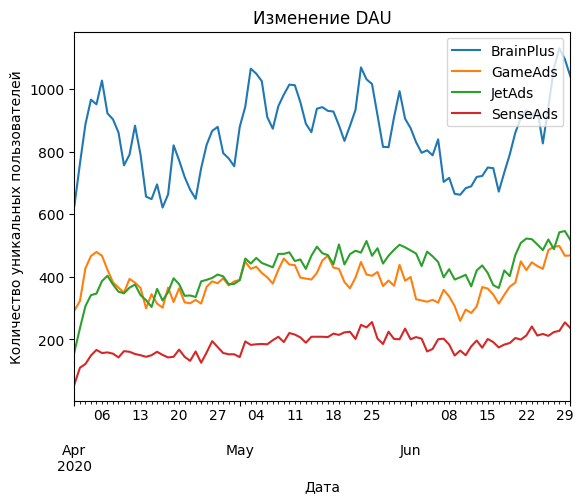

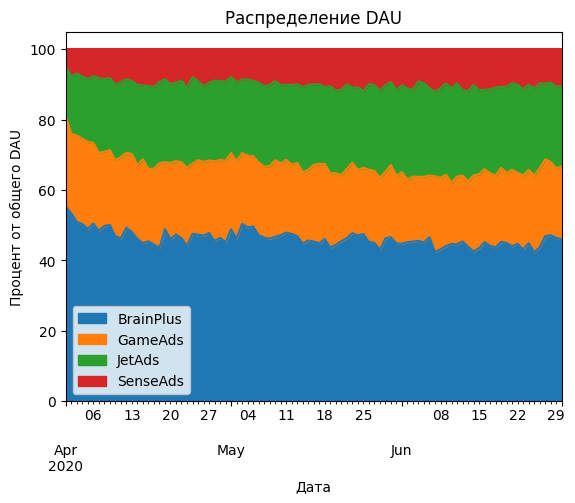

In [23]:
def DAU_describe(file):
    df6=pd.read_excel(file)
    print(df6)
    df6=df6.set_index("date")
    print(df6.plot())
    plt.title('Изменение DAU')
    plt.xlabel('Дата')
    plt.ylabel('Количество уникальных пользователей')
    df6["Total"]=df6.sum(axis=1)
    for i in range(len(df6)):
        for j in range(df6.shape[1]):
            df6.iloc[i,j]=(df6.iloc[i,j]/(df6["Total"][i]))*100   
    df6=df6.drop("Total",axis=1)
    df6.plot.area()
    plt.title('Распределение DAU')
    plt.xlabel('Дата')
    plt.ylabel('Процент от общего DAU')

DAU_describe("hw_lesson03_dau_channel.xlsx")
  
    

